## Задание 3.1.28

In [ ]:
3. Принимая решение x, полученное в п. 1, за точное, вычислить вектор d = (d1,...,dn)^T, di=(||x-x^i||∞)/(||x||∞), i=1,...,n относительных погрешностей решений x^i
Ax^i=b^i, i=1,...,n, где компоненты векторов b^i вычисляются по формулам: bk^i = bk + Δ, k=i & bk^i = bk, k!=i k=1,...,n (Δ-произвольная величина погрешности).
4. На основе вычисленного вектора d построить гистограмму. По гистограмме определить компоненту bm вектора b, которая оказывает наибольшее влияние на погрешность решения. 
5)5. Оценить теоретически погрешность решения x^m по формуле: δ(x^m) <= cond (A) δ(b^m). Сравнить значение δ(b^m) со значением практической погрешности dm 
УКАЗАНИЕ. Пусть функция cond(A) возвращает число обусловленности матрицы A, основанное на ∞-норме. Для вычисления || || ∞ вектора удобно воспользоваться встроенной функцией, возвращающей максимальную компоненту вектора v

In [63]:
import numpy as np

# Задаем размерность системы
N = 28
n = 5

# Создаем матрицу системы A
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = 0.1 * N * (i + 1) * (j + 1)
        if i == j:
            A[i, j] += N

# Создаем вектор правой части b
b = np.zeros(n)
for i in range(n):
    b[i] = 500 / ((8 * A[i, i] - 5) ** 2)

# Решаем систему методом Гаусса
x = np.linalg.solve(A, b)

print("Матрица A:")
print(A)
print("\nВектор b:")
print(b)
print("\nРешение x:")
print(x)


Матрица A:
[[30.8  5.6  8.4 11.2 14. ]
 [ 5.6 39.2 16.8 22.4 28. ]
 [ 8.4 16.8 53.2 33.6 42. ]
 [11.2 22.4 33.6 72.8 56. ]
 [14.  28.  42.  56.  98. ]]

Вектор b:
[0.00858016 0.00525023 0.00282639 0.00149974 0.00082394]

Решение x:
[ 2.85731909e-04  1.46103265e-04  3.88350416e-05 -2.92475514e-05
 -7.40857956e-05]


In [64]:
# Вычисляем число обусловленности матрицы A
cond_A = np.linalg.cond(np.abs(A), p=np.inf)

print("Число обусловленности матрицы A:", cond_A)


Число обусловленности матрицы A: 12.161538461538461


In [41]:
# Задаем произвольную величину погрешности
delta = 1e-6

# Создаем пустой вектор для хранения относительных погрешностей
d = np.zeros(n)

# Для каждого уравнения находим решение с небольшой погрешностью в правой части
for i in range(n):
    # Создаем вектор правой части b^i
    b_perturbed = np.copy(b)
    b_perturbed[i] += delta
    
    # Решаем систему с измененным вектором b
    x_perturbed = np.linalg.solve(A, b_perturbed)
    
    # Вычисляем относительную погрешность для i-го решения
    d[i] = np.linalg.norm(x_perturbed - x, ord=np.inf) / np.linalg.norm(x, ord=np.inf)

print("Вектор относительных погрешностей d:")
print(d)


Вектор относительных погрешностей d:
[1.23069332e-04 1.17300457e-04 1.07685666e-04 9.42249574e-05
 7.69183326e-05]


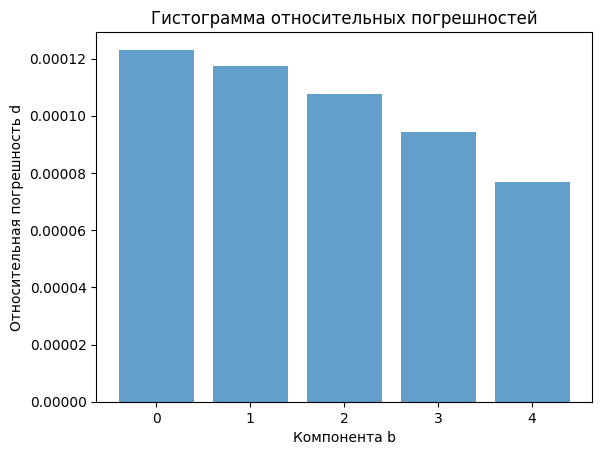

In [42]:
import matplotlib.pyplot as plt

# Создаем массив индексов для компонент вектора b
indices = np.arange(n)

# Строим гистограмму
plt.bar(indices, d, align='center', alpha=0.7)
plt.xlabel('Компонента b')
plt.ylabel('Относительная погрешность d')
plt.title('Гистограмма относительных погрешностей')
plt.xticks(indices)
plt.show()


In [43]:
# Находим индекс компоненты b, которая оказывает наибольшее влияние на погрешность решения
m = np.argmax(d)

print("Компонента b, которая оказывает наибольшее влияние на погрешность решения:", m)
print("Значение относительной погрешности для данной компоненты:", d[m])


Компонента b, которая оказывает наибольшее влияние на погрешность решения: 0
Значение относительной погрешности для данной компоненты: 0.00012306933217557615


In [44]:
# Вычисляем численное значение числа обусловленности матрицы A
cond_A = np.linalg.cond(A, p=np.inf)

# Вычисляем практическую погрешность delta(b^m)
delta_bm = np.max(np.abs(delta))

# Оцениваем теоретическую погрешность решения x^m
theoretical_error = cond_A * delta_bm

print("Число обусловленности матрицы A:", cond_A)
print("Практическая погрешность delta(b^m):", delta_bm)
print("Теоретическая погрешность решения x^m:", theoretical_error)

Число обусловленности матрицы A: 12.161538461538461
Практическая погрешность delta(b^m): 1e-06
Теоретическая погрешность решения x^m: 1.216153846153846e-05


## Задание 3.2

In [45]:
# Задаем произвольную величину погрешности для матрицы A
delta_A = 1e-6

# Создаем возмущенную матрицу A*
A_perturbed = A + delta_A

# Вычисляем численное значение числа обусловленности матрицы A
cond_A = np.linalg.cond(A, p=np.inf)

# Оцениваем теоретическую погрешность решения x*
theoretical_error_A = cond_A * delta_A

print("Число обусловленности матрицы A:", cond_A)
print("Практическая погрешность delta(A*):", delta_A)
print("Теоретическая погрешность решения x*:", theoretical_error_A)


Число обусловленности матрицы A: 12.161538461538461
Практическая погрешность delta(A*): 1e-06
Теоретическая погрешность решения x*: 1.216153846153846e-05


## Задание 3.10.6

In [57]:
import numpy as np

n = 30

# Инициализация векторов для коэффициентов прогона
alpha = np.zeros(n-1)
beta = np.zeros(n)

# Инициализация массивов для матрицы A и вектора b
A = np.zeros((n, n))
b = np.zeros(n)

# Заполнение матрицы A и вектора b
for i in range(n):
    b[i] = (i+1) * np.exp(22/(i+1))
    A[i, i] = 100
    if i < n-1:
        A[i, i+1] = 47
        A[i+1, i] = 47
    if i < n-20:
        A[i, i+20] = 1
        A[i+20, i] = 1

# Прямой ход (нахождение прогоночных коэффициентов)
alpha[0] = -A[0, 1] / A[0, 0]
beta[0] = b[0] / A[0, 0]
for i in range(1, n-1):
    alpha[i] = -A[i, i+1] / (A[i, i] + A[i, i-1] * alpha[i-1])
    beta[i] = (b[i] - A[i, i-1] * beta[i-1]) / (A[i, i] + A[i, i-1] * alpha[i-1])

# Обратный ход (нахождение решения x)
x = np.zeros(n)
x[n-1] = (b[n-1] - A[n-1, n-2] * beta[n-2]) / (A[n-1, n-1] + A[n-1, n-2] * alpha[n-2])
for i in range(n-2, -1, -1):
    x[i] = alpha[i] * x[i+1] + beta[i]

print("Решение x:", x)


Решение x: [ 5.34580856e+07 -3.74658662e+07  2.62590712e+07 -1.84044004e+07
  1.28992483e+07 -9.04080017e+06  6.33650169e+06 -4.44111486e+06
  3.11268154e+06 -2.18160960e+06  1.52904295e+06 -1.07167153e+06
  7.51110841e+05 -5.26435141e+05  3.68965360e+05 -2.58596157e+05
  1.81240576e+05 -1.27020770e+05  8.90176816e+04 -6.23772657e+04
  4.37011835e+04 -3.06027019e+04  2.14122206e+04 -1.49539406e+04
  1.04059515e+04 -7.18509923e+03  4.88278302e+03 -3.20250322e+03
  1.93236067e+03 -9.07584910e+02]


In [58]:
# Проверка решения
b_calculated = np.dot(A, x)

# Вычисление относительной ошибки
relative_error = np.linalg.norm(b - b_calculated) / np.linalg.norm(b)

print("Проверка решения:")
print("Вектор b (заданный):", b)
print("Вектор b (вычисленный):", b_calculated)
print("Относительная ошибка:", relative_error)


Проверка решения:
Вектор b (заданный): [3.58491285e+09 1.19748283e+05 4.59142458e+03 9.78767729e+02
 4.07254343e+02 2.34727704e+02 1.62189806e+02 1.25141055e+02
 1.03717310e+02 9.02501350e+01 8.12796171e+01 7.50564114e+01
 7.06160213e+01 6.73892764e+01 6.50214274e+01 6.32812276e+01
 6.20121908e+01 6.11050174e+01 6.04812691e+01 6.00833205e+01
 5.98679609e+01 5.98022002e+01 5.98604461e+01 6.00225603e+01
 6.02724927e+01 6.05973028e+01 6.09864483e+01 6.14312581e+01
 6.19245383e+01 6.24602725e+01]
Вектор b (вычисленный): [ 3.58495655e+09  8.91455816e+04  2.60036452e+04 -1.39751729e+04
  1.08132058e+04 -6.95037153e+03  5.04497282e+03 -3.07736216e+03
  2.03607798e+03 -8.17334775e+02  8.12796171e+01  7.50564114e+01
  7.06160213e+01  6.73892764e+01  6.50214274e+01  6.32812276e+01
  6.20121908e+01  6.11050174e+01  6.04812691e+01  6.00833205e+01
  5.34581455e+07 -3.74658064e+07  2.62591311e+07 -1.84043404e+07
  1.28993086e+07 -9.04073957e+06  6.33656267e+06 -4.44105343e+06
  3.11274346e+06 -2.181